# Lección II

#### _<font color=blue>  Objetivo de la lección: </font>_

<font color=blue>
 Aprender las diferentes fases del Aprendizaje de Datos (ML): Análisis exploratorio  de los datos. 
</font>

La librerias de __Python__ que se usan en esta lección del curso son 

* <b>Pandas</b> para la manipulación e ingesta de los datos
* <b>Matplotlib</b> and <b> seaborn</b> para la vizualización de los datos
* <b>Numpy</b> para computo de arreglos multidimensionales
* <b>sklearn</b> para el aprendizaje de máquinas y el modelado predectivo

### Proceso de Instalación 

Una manera sencilla de instalar esta paqueteria es descargar e instalar 
la distribucion <a href="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install">Conda</a> que encapsula a todas las librerias mencionadas. Esta distribución esta disponible en todas las plataformas (Windows, Linux and Mac OSX).

### El conjunto de datos (Wisconsin) del Cáncer de mama

El caso de estudio es el conjunto de datos obtenidos para el cancer de mama en el hospital de Wisconsin. El articulo donde se describe la metología empleada para la obtencion de las caracteristicas de la informacion es

 _[K. P. Bennett y O. L. Mangasarian: "Discriminación robusta de la programación lineal de dos conjuntos linealmente inseparables", Métodos de optimización y software 1, 1992, 23-34]._

#### El conjunto de datos (Wisconsin) del Cáncer de mama
 
Del artículo mencionado, se lee que:

"Cada registro representa información de seguimiento para un caso cáncer de mama. 
Estos  pacientes han sido atentidos por el Dr. Wolberg desde el año 1984,
están incluídos sólo aquellos casos que exhiben cáncer de mama y donde no hay evidencia de metástasis 
a distancia en el tiempo de diagnóstico."


_Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria_ 



<img style="float: center;" src="../images/fna-cell.png">


<h5 align="justify">Imagen ampliada de un seno maligno obtenida con la biopsia FNA (Fine Needle Aspiration). Los núcleos de células visibles se han esbozado con la ayuda de un programa de ajuste de curvas. El sistema también calcula varias características para cada núcleo y diagnostica con precisión la muestra. El proceso de diagnóstico interactivo toma alrededor de 5 minutos por muestra.</h5> 

FUENTE: K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34



Los datos se encuentran en el 
  __[repositorio de aprendizaje automático de UCI:](  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)__  
***
_El repositorio de aprendizaje automático de UCI es una colección de bases de datos, teorías de dominio y generadores de datos que la comunidad de aprendizaje automático utiliza para el análisis empírico de los algoritmos de aprendizaje automático. El archivo fue creado como archivo ftp en 1987 por David Aha y otros estudiantes graduados en UC Irvine. Desde entonces, ha sido ampliamente utilizado por estudiantes, educadores e investigadores de todo el mundo como fuente principal de conjuntos de datos de aprendizaje automático._

<h2 align="center">El flujo de trabajo en un proyecto de ciencia de datos </h2>

El conjunto de  lineamientos específicos ('ducto') en un proyecto de  ciencia de datos varía dependiendo de la naturaleza del mismo. Un ducto estandar consiste en:

### Análisis exploratorio de los datos

### Ingeniería de Características

### Modelado de datos

 ***
 Específicamente, en esta lección se trata el primer punto


## Análisis exploratorio de los datos

_En estadística, el análisis exploratorio de los datos  representa un enfoque para analizar conjuntos de datos que resumen sus características principales, a menudo con métodos visuales._

El Análisis exploratorio consiste en realizar las siguientes tareas especificas

 - __Extracción__: Cargar el conjunto de datos y echarles una mirada
 - __Limpieza__: Encontrar los valores que faltan
 - __Visualización__: Crear algunas gráficas interesantes que nos permitan idendificar correlaciones 
 

_Con el siguiente comando se ajusta el libro trabajo para tener graficas centradas_ 

In [12]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


## Análisis exploratorio de los datos

  **Extracción** 
  
  Se obtienen los datos directamente del URL oficial del repositorio de datos. Para ello, se importa la biblioteca _wget_

In [13]:
import wget,os

local_path = '../data/wisconsin.csv'

if os.path.isfile(local_path) == False:
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases'+ \
          '/breast-cancer-wisconsin/wdbc.data'     
    wget.download(url, local_path)        

En el sitio del repositorio se encuentra un
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names">archivo con las características de la  información</a>

Más espeficamente, en el punto siete  se describen los atributos de los datos. Los primeros dos atributos (o caracteristicas) son:

    1) ID 
    2) Diagnosis (M = Maligno, B = Benigno)

Se calculan diez características de valor real para cada núcleo celular:

    a) radio ( media de las distancias desde el centro al perímetro)    
    b) textura (desviación estándar de los valores de escala de grises)
    c) perímetro
    d) área
    e) suavidad (variación local en longitudes de radio)
    f) compacidad (perímetro ^ 2 / área - 1.0)
    g) concavidad (severidad de las porciones cóncavas del contorno)
    h) puntos cóncavos (número de porciones cóncavas del contorno)
    i) simetria
    j) dimensión fractal ("aproximación de la línea de costa" - 1)

La media, el error estándar y el "peor" o mayor (media de las tres
los valores más grandes) de estas características se calcularon para cada imagen,
dando como resultado 30 características. Por ejemplo, el campo 3 es Radio medio, campo
13 es el radio SE, el campo 23 es el peor radio.
    
Todos los valores de las funciones se registran con cuatro dígitos significativos.

### Características de los datos 
***
Los datos del archivo que se han descargado, no poseen las correspondientes etiquetas (_a) radio, b) textura,..._). Tenemos 30  mediciones, el ID y el diagnostico. Entonces se cuenta con un número total de 32 atributos.  Las siguientes instrucciones  crean un arreglo de características.  

In [14]:
features =  ['a:radio','b:textura','c:perimetro', \
             'd:area', 'e:suavidad','f:compactes', \
             'g:concavidad', 'h:puntos_concavos','i:simetria',\
             'j:dimension_fractal']

columns_all = ['ID', 'Diagnostico'] + \
              list(map(lambda x: x[2:] + '_promedio', features)) + \
              list(map(lambda x: x[2:] + '_error', features)) +  \
              list(map(lambda x: x[2:] + '_peor', features))

El manejo de los datos estará a cargo de la biblioteca **Pandas**.

**Pandas**, una herramienta de análisis de datos para el lenguaje de programación Python, es actualmente la herramienta de análisis de datos abierta más popular y madura. La biblioteca está altamente optimizada para el rendimiento, con rutas de código críticas escritas en _Cython_ o _C_.

Cargue el conjunto de datos:

In [15]:
import pandas as pd

data = pd.read_csv('../data/wisconsin.csv', names = columns_all);
data = data.reset_index().drop(columns =['index'])

#### Vista de los datos.  
Escoja un número aleatorio de 5 registros:

In [16]:
data.sample(5)

,ID,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
374,9013005,B,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,...,14.84,20.21,99.16,670.6,0.1105,0.20960,0.1346,0.06987,0.3323,0.07701
224,8813129,B,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,15.14,23.60,98.84,708.8,0.1276,0.13110,0.1786,0.09678,0.2506,0.07623
515,916221,B,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,...,12.47,23.03,79.15,478.6,0.1483,0.15740,0.1624,0.08542,0.3060,0.06783
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.0000,0.00000,0.2475,0.06969
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,...,10.62,14.10,66.53,342.9,0.1234,0.07204,0.0000,0.00000,0.3105,0.08151



### Análisis Exploratorio de los Datos

  **Limpieza** 
  
  El análisis de datos en el aprendizaje de las maquinas supone uniformadidad de los datos para un mismo atributo.
  Cuando extraemos los datos pueden que no esten presentados  de manera uniforme (por ejemplo alguna medición pudo no haberse efectuado y en ese casa el atributo para ese registro presenta un valor nulo) y un proceso de limpieza se vuelve mandatorio.
  En nuestro caso, el <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"> archivo de atributos </a> especifica que:
  
      8. Valores de atributo faltantes: ninguno
      
Por lo que no hay datos faltantes. 

***
La limpieza de datos es tan importante para el analisis de datos, que **Pandas** tiene cargados metodos de deteccion de valores nulos.

Verifique  que  todos los registros estan llenos:

In [17]:
data.isnull().sum()

ID                            0
Diagnostico                   0
radio_promedio                0
textura_promedio              0
perimetro_promedio            0
area_promedio                 0
suavidad_promedio             0
compactes_promedio            0
concavidad_promedio           0
puntos_concavos_promedio      0
simetria_promedio             0
dimension_fractal_promedio    0
radio_error                   0
textura_error                 0
perimetro_error               0
area_error                    0
suavidad_error                0
compactes_error               0
concavidad_error              0
puntos_concavos_error         0
simetria_error                0
dimension_fractal_error       0
radio_peor                    0
textura_peor                  0
perimetro_peor                0
area_peor                     0
suavidad_peor                 0
compactes_peor                0
concavidad_peor               0
puntos_concavos_peor          0
simetria_peor                 0
dimensio

***


 En este estudio no es necesario sabear el 'ID' del paciente. Por lo que lo se elimina  de nuestros datos:

In [18]:
data = data.drop(columns='ID')
data.sample(2)

,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
23,M,21.16,23.04,137.20,1404.0,0.09428,0.1022,0.10970,0.08632,0.1769,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
560,B,14.05,27.15,91.38,600.4,0.09929,0.1126,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321



### Análisis Exploratorio de los Datos

  **Visualización: Tablas** 
  
Pandas  permite tener una descripción estadística simple de alto nivel de las características numéricas. Esto se puede hacer usando el método de descripción (_describe()_).
   

In [19]:
data.describe()

,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos_concavos_promedio,simetria_promedio,dimension_fractal_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos_concavos_peor,simetria_peor,dimension_fractal_peor
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


En _estadística_, la desviación estándar (representada por el índice **std** en la tabla anterior) es una medida que se utiliza para cuantificar la cantidad de variación o dispersión de un conjunto de valores de datos.  Una baja desviación estándar indica que los puntos de datos tienden a estar cerca de la media (también llamado el valor esperado) del conjunto, mientras que una alta desviación estándar indica que los puntos de datos se extienden en un rango más amplio de valores

**Visualización: Gráficas** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. También ayuda a explicar los datos a otra persona.

**Python** tiene varias bibliotecas de visualización interesantes, como **Matplotlib**, **Seaborn**, etc. Todos los atributos del conjunto de datos de Winsconsin son valores númericos. Para tener una idea de como se encuentran distribuídos, se agrupan en intervalos especificos. Después se generan las correspondientes  gráficas para estas distribuiciones
***

Use  la visualización de **Pandas** que se construye sobre **Matplotlib** para encontrar la distribución de datos de los atributos: 

Diagnostico
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

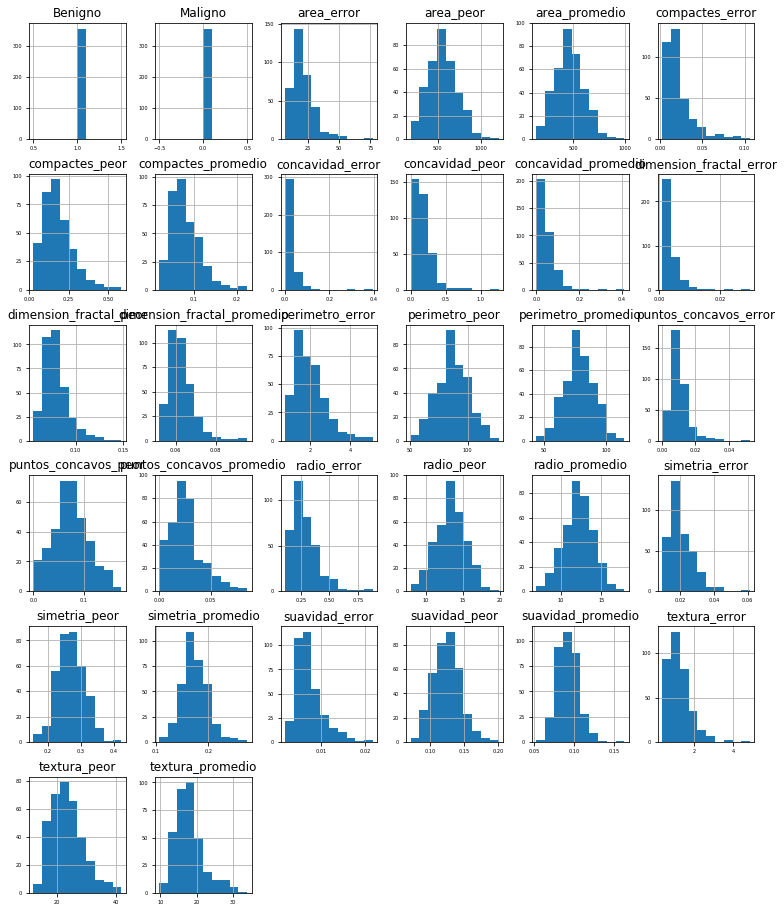

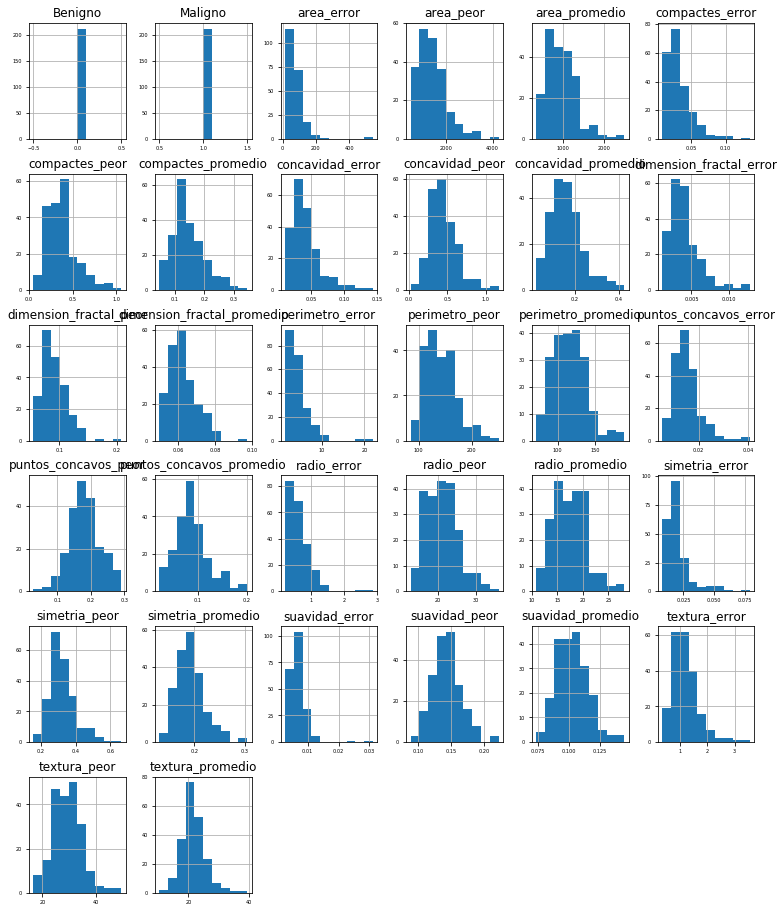

In [32]:
#Visualization of data
data.groupby('Diagnostico').hist(figsize=(13, 16),xlabelsize = 5, ylabelsize = 5)

De aqui se ve que  **Pandas** nos genera histrogramas haciendo divisiones automáticas en los intervalos de los datos. A veces se necesita ser más específico en el como se divirá las información, por lo que es necesario generar rutinas de codigo adicionales.

El manejo de números con decimales se realiza se la librería **NumPy**.

**NumPy** es el paquete fundamental para la computación científica con **Python**. Además de sus obvios usos científicos, **NumPy** también se puede usar como un eficiente contenedor multidimensional de datos genéricos. Se pueden definir tipos de datos arbitrarios. Esto permite que NumPy se integre a la perfección con una amplia variedad de bases de datos.

La siguiente función agrupa los datos de una columna en intervalos iguales:

In [21]:
import numpy as np

def divide_en_intervalos(columna,tajada):
    
    minimo = data[columna].min()
    maximo = data[columna].max()
    
    intervalos = np.linspace(minimo, maximo,tajada)
        
    return pd.cut(np.float64(data[columna]), intervalos,precision=4,right=True,include_lowest=True)
   

Con esta función, construya otra función que itere sobre todas las columnas de nuestros datos númericos (y quite a la vez la columna 'Diagnostico'):

In [22]:
def intervalos(tajada):
    
    data_numerical = data.drop(columns=['Diagnostico'])
    intervalos = {}
    
    for column in data_numerical:
        
        intervalos[column] = divide_en_intervalos(column,tajada + 1)      
    
    return intervalos


_EJEMPLO._ El caso de 5 intervalos para el _radio promedio_:

In [23]:
print(intervalos(5)['radio_promedio'].describe())        

                    counts     freqs
categories                          
(6.9809, 11.2068]       98  0.172232
(11.2068, 15.4326]     314  0.551845
(15.4326, 19.6584]     105  0.184534
(19.6584, 23.8842]      45  0.079086
(23.8842, 28.11]         7  0.012302


Para tener una idea de como se encuentra distribuído el conjunto de datos, se agrupan  en intervalos específicos. Después se generan las gráficas para estas distribuiciones
***

En ciencias de la computación, el tipo de datos _booleano_ es un tipo de datos que tiene uno de dos valores posibles (generalmente denotados como verdadero y falso), destinado a representar los dos valores de verdad de la lógica y el _álgebra booleana_.

Creamos la columnas booleanas _Benigno_ y _Maligno_

La columna _Benigno_ es igual a 1 si el diagnostico es 'Benigno' y 0 si es 'Maligno'

La columna _Maligno_ es igual a 0 si el diagnostico es 'Benigno' y 1 si es 'Maligno'

In [24]:
data['Benigno'] = (data['Diagnostico']=='B')*1
data['Maligno'] = 1 - data['Benigno']

¿Qué relación guardan la forma del núcleo de la célula con la incidencia en el cáncer?

Para tener poder constestar esta pregunta, se emplea un histograma de los casos positivos y negativos agrupados en los grupos de tamaño que escogimos anteriormente.

**Pandas** incorpora rutinas de gráficos  de las bibliotecas **Matplotlib** (especificamente la sublibrería **Pyplot**) y  **Seaborn**

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

Defina  una función para generar un histograma que compara casos benignos y malignos en cada conjunto de intervalos númericos para un atributo en específico:

In [26]:
def histograma_benigno_maligno(intervalo,atributo,xdecimales):
    
    agrupado = data.groupby(intervalo[atributo])[['Benigno','Maligno']].sum();
    ax = agrupado.plot.bar(
                          rot=0, \
                          figsize=(5, 5),\
                          width = 0.9, \
                          stacked=True, 
                          title = atributo,   
                          color=['blue', 'r']
                        );
    
    xlabels = [str(np.around(c.left,decimals=xdecimales)) + ' a ' + str(np.around(c.right,decimals=xdecimales)) \
               for c in  agrupado.index.values];

    ax.set_xticklabels(xlabels,fontsize=8);
    
    return ax

Por ejemplo, el histograma para el radio promedio divido en tres tajadas es:

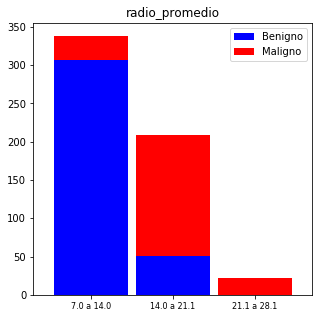

In [27]:
ax = histograma_benigno_maligno(intervalos(3),'radio_promedio',1)
plt.show()

Se puede ver que los radios mas pequeños representan mayores casos de cáncer. Mientras que los radios más grandes son casi todos casos malignos. Veamos si esta tendencia se mantiene al nivel de áreas y perímetros: 

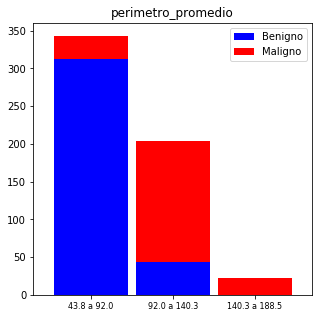

In [28]:
ax = histograma_benigno_maligno(intervalos(3),'perimetro_promedio' ,1)

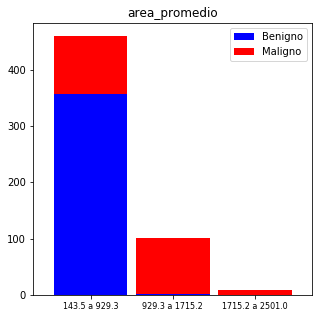

In [29]:
ax = histograma_benigno_maligno(intervalos(3),'area_promedio',1 )

En caso del área, la tendencia discutida en el caso del radio es mas aguda:

1) La mayoría de los casos de cáncer aparecen en áreas pequeñas

2) Las áreas pequeñas representan en su mayoría casos benignos, mientras que las áreas grandes representan en su mayoría casos malignos
***

Considere los atributos que _no_ están relacionados con la _extension_ de  los núcleos, sino con lo _características_ de la figura. Dos de estos atributos son la _simetría_ y la _dimensión fractal_

### Simetría 

![](../images/symmetry.png)

_<div style="text-align: center"> Para medir la simetría, se encuentra el eje mayor. Luego, se mide la diferencia de longitud entre las líneas perpendiculares al eje mayor del límite de la celda en ambas direcciones. </div>_

### Dimensión Fractal

![](../images/fractal_dimension.png)

_<div style="text-align: center"> La dimensión fractal de una celda se aproxima utilizando la aproximación de "línea de costa" descrita por Mandelbrot. El perímetro del núcleo se mide utilizando 'reglas' cada vez más grandes. A medida que aumenta el tamaño de la regla, disminuye la precisión de la medición y disminuye el perímetro observado. Al trazar estos valores en una escala logarítmica y medir la pendiente descendente se obtiene (el negativo de) una aproximación a la dimensión fractal. Al igual que con todas las características de la forma, un valor más alto corresponde a un contorno menos regular y, por lo tanto, a una mayor probabilidad de malignidad. </div>_

[_REFERENCIA_: Nuclear feature extraction for breast tumor diagnosis
W. Nick Street, W. H. Wolberg, O. L. Mangasarian, Proceedings Volume 1905, Biomedical Image Processing and Biomedical Visualization; (1993) ]



***
Haga histogramas para estos dos atributos:

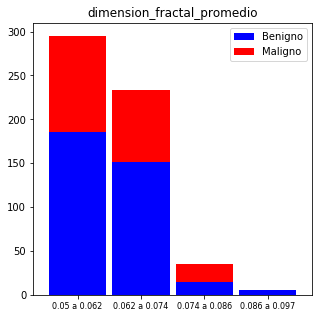

In [30]:
ax = histograma_benigno_maligno(intervalos(4),'dimension_fractal_promedio',3 )

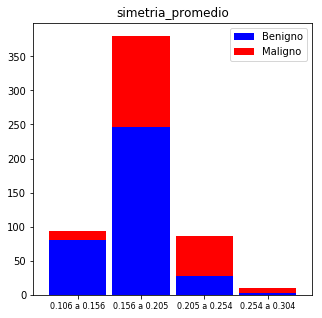

In [31]:
ax = histograma_benigno_maligno(intervalos(4),'simetria_promedio',3 )

La distribución de tamaños en intervalos iguales no influye de manera tan decisiva en el tipo de cáncer (Maligno vs Benigno) como en el caso de áreas, radios y perímetros.

### Conclusiones 

Se ha visto como las diferentes características de los datos nos arrojan patrones permiten  diferenciar los casos malignos de los casos beginos. Una buena ingeniería de características es de vital importancia  cuando los conjuntos de datos son grandes, además nos ayuda a evitar el fenómeno de _'overfitting'_.

En la siguiente sección se implementan las rutinas de Aprendizaje de Datos que permiten ofrecer predicciones